<a href="https://colab.research.google.com/github/amir-ghaffari/clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###welcome to this simple k-means clustering demonstration for text matching

#libraries

In [1]:
import pandas as pd
from transformers import AutoModel
import torch
import os.path as path
import numpy as np

import ipywidgets as widgets

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import defaultdict
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

#loading the model

In [ ]:
%%capture
model = AutoModel.from_pretrained("jinaai/jina-embeddings-v3", trust_remote_code=True)

#loading the data and preprocessing

####please upload your file and enter it's name (with sufix)

In [ ]:
# @title
file_path = input("file name (with sufix): ")

file name (with sufix): reasons.xlsx


###please define the colum you want the clustering algorithm to be performed on
*** first colum is zero ***

In [ ]:
# @title
colum = int(input('witch colum: '))
colums_to_use = [colum]

witch colum: 2


In [ ]:
# @title
data = pd.read_excel(file_path, usecols=colums_to_use, header = None, keep_default_na=False)
text = np.reshape(data, 1274*1)

In [ ]:
# @title
if path.exists('embedding.csv') == 1:
    embedding = np.array(pd.read_csv('embedding.csv'))
else:
    embedding = model.encode(text, task="text-matching")
    db=pd.DataFrame(embedding)
    db.to_csv('embedding.csv', index=False)

In [ ]:
embeddings_np = torch.tensor(embedding).numpy()
#np.shape(embeddings_np)

#finding the optimum number of clusters

###please define the range of searching for the optimum k

In [ ]:
# @title
style = {'description_width': 'initial'}
w = widgets.IntRangeSlider(value=[10, 25], min=5, max=50, step=1, description='define the range of k:', orientation='horizontal',
                           readout=True, layout=widgets.Layout(width='600px', height='100px'), style=style)
w

IntRangeSlider(value=(10, 25), description='define the range of k:', layout=Layout(height='100px', width='600p…

In [ ]:
k = w.value
min_k = k[0]
max_k = k[1]

In [ ]:
kmeans_clustering = []
kmeans_labels =[]
k_sil_scores = []
K_WCSS = []
k_davies_scores = []

for i in range (min_k,max_k+1):
    kmeans = KMeans(n_clusters=i, random_state=40, init='k-means++', n_init='auto')
    clustering = kmeans.fit_predict(embeddings_np)
    sil_score = silhouette_score(embeddings_np, clustering)
    davies_score = davies_bouldin_score(embeddings_np, clustering)

    kmeans_clustering.append(kmeans)
    kmeans_labels.append(clustering)
    k_sil_scores.append(sil_score)
    k_davies_scores.append(davies_score)
    K_WCSS.append(kmeans.inertia_)

#results
###these are the performance scores of the clustering algorithm with different number of clusters (k):

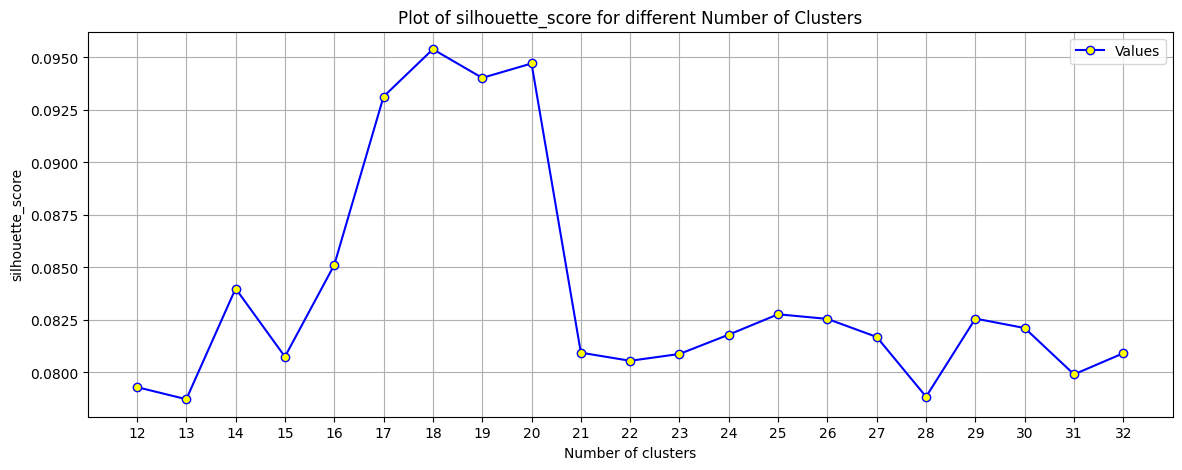

In [ ]:
# @title
num_of_clusters=list(range(min_k,max_k+1))
plt.figure(figsize=(14, 5))  # Set the figure size
plt.plot(num_of_clusters, k_sil_scores, marker='o', mfc='yellow', linestyle='-', color='b', label='Values')

plt.xticks(range(min(num_of_clusters), max(num_of_clusters) + 1, 1))

plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.title('Plot of silhouette_score for different Number of Clusters')

plt.grid(True)

plt.legend()

plt.show()

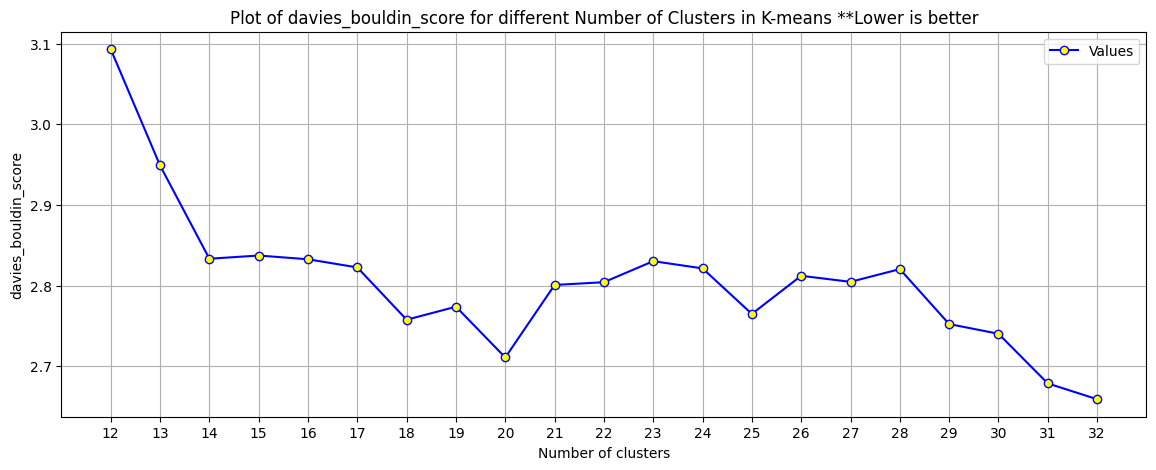

In [ ]:
# @title
plt.figure(figsize=(14, 5))  # Set the figure size
plt.plot(num_of_clusters, k_davies_scores, marker='o', mfc='yellow', linestyle='-', color='b', label='Values')

plt.xticks(range(min(num_of_clusters), max(num_of_clusters) + 1, 1))

plt.xlabel('Number of clusters')
plt.ylabel('davies_bouldin_score')
plt.title('Plot of davies_bouldin_score for different Number of Clusters in K-means **Lower is better')

plt.grid(True)

plt.legend()

plt.show()

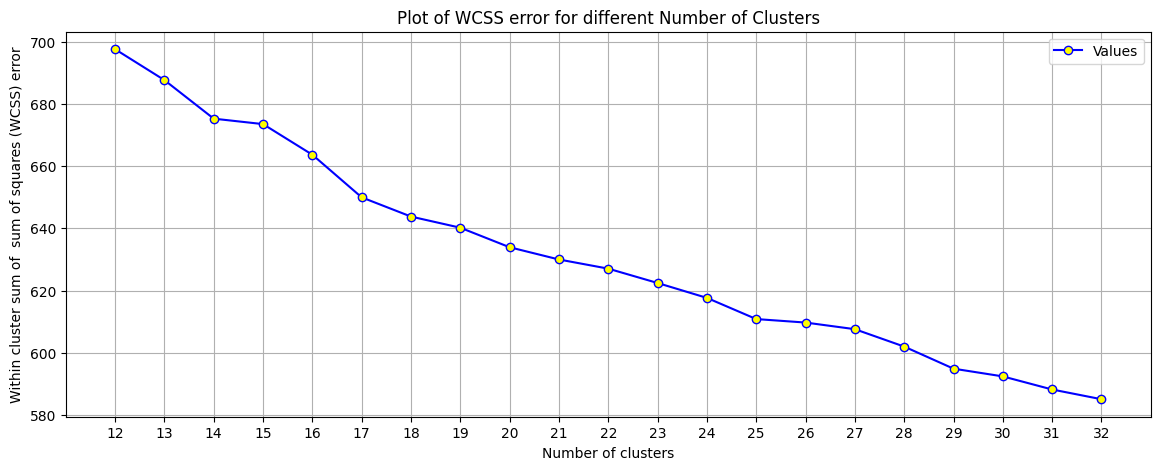

In [ ]:
# @title
plt.figure(figsize=(14, 5))  # Set the figure size
plt.plot(num_of_clusters, K_WCSS, marker='o', mfc='yellow', linestyle='-', color='b', label='Values')

plt.xticks(range(min(num_of_clusters), max(num_of_clusters) + 1, 1))

plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of  sum of squares (WCSS) error')
plt.title('Plot of WCSS error for different Number of Clusters')

plt.grid(True)

plt.legend()

plt.show()

#clustering the data using the optimum value of k
###please define the best k using the scores above

In [ ]:
w1 = widgets.IntSlider(description='define the optimum value of k:', min=5, max=40, value=20,
                       layout=widgets.Layout(width='600px', height='100px'), style=style)
display(w1)

IntSlider(value=20, description='define the optimum value of k', layout=Layout(height='100px', width='600px'),…

In [ ]:
k_optimal = w1.value
k_optimal

20

#clustering the data and saving it to an excel file

In [ ]:
kmeans = KMeans(n_clusters=k_optimal, random_state=40, n_init=10)
clusters = kmeans.fit_predict(embeddings_np)

clustered_data=pd.read_excel(file_path, header=None, names=['gender', 'status', 'reason'], keep_default_na=False, dtype=list)
clustered_data['Cluster'] = clusters

clustered_data_sorted=clustered_data.sort_values('Cluster')

if path.exists("clustered_reasons.xlsx") == 0:
    clustered_data.to_excel("clustered_reasons.xlsx", index=False)
    print("clusters succesfully saved you can download the clustered_reasons excel file")

if path.exists("clusterd_data_sorted.xlsx") == 0:
    clustered_data_sorted.to_excel("clusterd_data_sorted.xlsx", index=False)
    print("sorted clusters succesfully saved you can download the clustered_reasons_sorted excel file")

#**important:** to perform clustering on new data u must remove the files or restart the session

In [ ]:
grouped_reasons = data.groupby('Cluster')['reason'].apply(list).reset_index()

for index, row in grouped_reasons.iterrows():
    print(f"Cluster {row['Cluster']}:")
    print('\n'.join(list(set(row['reason'][:21]))))
    print("." * 100)

Cluster 0:
یک سفر شش ماه کاری داشتم که وقفه افتاد
تغییر شرایط کاری داشتند
تغییر پست شغلی داشتند معاون شده اند و خیلی درگیر بودند
مشکل کاری داشتم که وقتم رو زیاد می گرفت
مشغله های کاری داشتم ولی حل شد
به دلیل مشغله زیاد
مشقله کاری زیاد باعث شد در دیدن جلسات وقفه بیفتد
من کارگر معدن هستم و انتن نداشتم
مغازه دار هستم و یه مدتی کارم زیاد شده بود
یه مقدار کارم زیاد شده بود و وقفه افتاده بود
مشکلات شغلی داشتم که وقت کم آورده بودم
مشغله زیاد داشتند
مشکلی در کار و خانواده داشتند
مشکلات کاری پیش اومده بود
دبیر هستند و درگیر قسمتی از اداره هم هستند
مشغله زیاد و تنبلی
مشکلات کاریم زیاد بود و امروز فردا می شد
یه مقداری مشغله کاری داشتم ولی بیشتر تنبلی بود
من شغلم طوری هست برام خیلی سخت بود ولی حتما توی فکر هستم
....................................................................................................
Cluster 1:
درگیر کار و دانشگاه هستند
خیلی درگیر دانشگاه بودند
درگیر آزمون هستند
در گیر آزمون سختی برای تابستان هستند
درگیر امتحانات و بیکاری هستند
درگیر کنکور هستند و قرار شد
کنکوری هستند ود